# Boston Housing Price Prediction
The Boston housing dataset contains information collected by the U.S Census Service in the 1970s about housing in the area of Boston. There are 506 instances and each row describes a suburb or town in Boston. It has 14 features used to describe the rows. These features range from environmental factors to socio-economical, as well as house size and age of the house. The last row describes the median price of owner-occupied houses in Boston. 
The goal of this project is to train machine learning models to estimate the median prices of houses in Boston. We will train a few supervised regression models and compare the results to determine the best model.



# Dataset


The following describes the dataset columns:


*   **CRIM** - per capita crime rate by town
*   **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft
*   **INDUS** - proportion of non-retail business acres per town.
*   **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   **NOX** - nitric oxides concentration (parts per 10 million)
*   **RM** - average number of rooms per dwelling
*   **AGE** - proportion of owner-occupied units built prior to 1940
*   **DIS** - weighted distances to five Boston employment centres
*   **RAD** - index of accessibility to radial highways
*   **TAX** - full-value property-tax rate per $10,000

*   **PTRATIO** - pupil-teacher ratio by town
*   **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   **LSTAT** - % lower status of the population
*   **MEDV** - Median value of owner-occupied homes in $1000's
















# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#From sklearn
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Dataset description
boston = load_boston()

In [ ]:
#Changing the data to a panda's Dataframe
boston_df = pd.DataFrame(boston['data'] )
#Adding column names
boston_df.columns = boston['feature_names']
print(boston_df.shape)
boston_df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
#Adding the target as PRICE
boston_df['PRICE'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Data Analysis

In [ ]:
boston_df.shape

(506, 14)

There are 14 features for 506 houses in this dataset

In [ ]:
#Checking for missing values
print(np.sum(np.isnan(boston_df)))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


There are no missing values in the dataset

In [ ]:
#data statistics
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Vizualising the Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


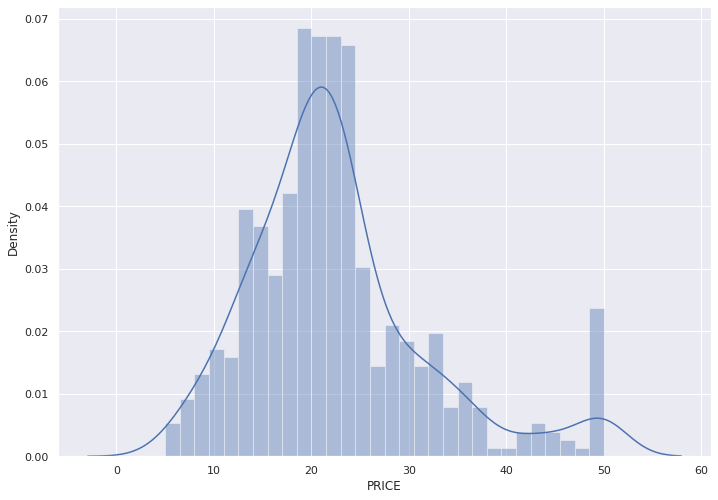

In [ ]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston_df['PRICE'], bins=30)
plt.show()

The values of PRICE are normally distributed







In [ ]:
corr_matrix = boston_df.corr()
pd.DataFrame(corr_matrix["PRICE"].sort_values(ascending=False))

,PRICE
PRICE,1.000000
RM,0.695360
ZN,0.360445
B,0.333461
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321


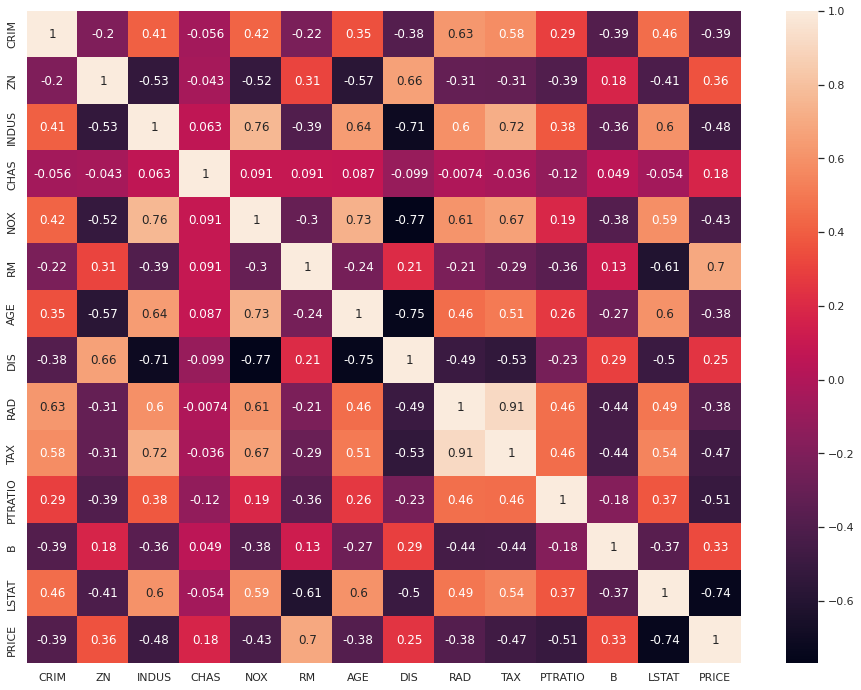

In [ ]:
#Finding out the correlation between the features
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(boston_df.corr(),annot=True)




*   From the above coorelation plot we can see that **RM** has a strong postive correlation and **LSTAT** has a strong negative correlation to **PRICE**. This means that the price increases as the number of rooms goes up. The price of the houes decreases as the number of lower status population goes up. 

*   **PTRATIO**, **NOX**, and **TAX** are also correlated to **PRICE**






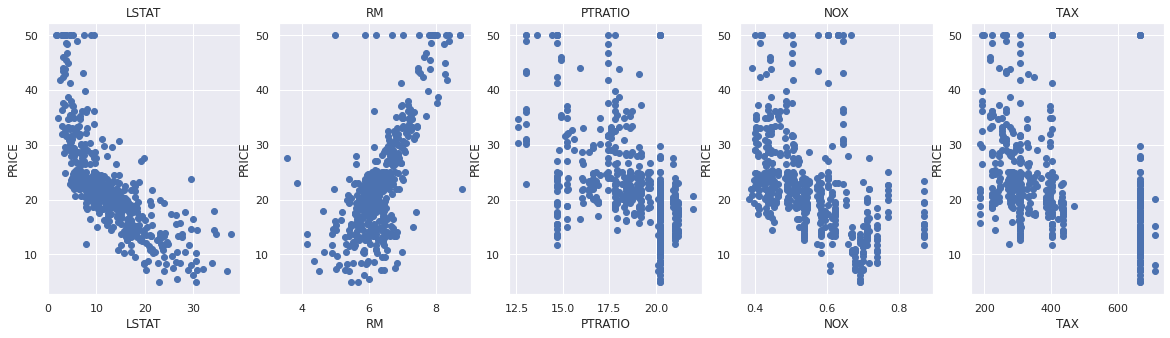

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','PTRATIO','NOX','TAX']
target = boston_df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

**Splitting into train and test**


In [ ]:
X = pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM'],boston_df['PTRATIO'],boston_df['NOX'],boston_df['TAX']], columns = ['LSTAT','RM','PTRATIO','NOX','TAX'])
Y = boston_df['PRICE']

#Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)
X = X_scaled



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(404, 5) (102, 5) (404,) (102,)


# Linear Regression


In [ ]:
lm = LinearRegression()
lm.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,LSTAT,-4.6212
1,RM,2.76105
2,PTRATIO,-2.01285
3,NOX,0.134798
4,TAX,-0.164031


### Model Evaluation


In [ ]:
### Training set

y_train_predict = lm.predict(X_train)
train_rmse_linear = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
linear_r2_train = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(train_rmse_linear))
print('R2 score is {}'.format(linear_r2_train))

The model performance for training set
RMSE is 5.302714217722348
R2 score is 0.672663301524459


In [ ]:
### Test set
y_test_predict = lm.predict(X_test)
test_rmse_linear = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
linear_r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print('RMSE is {}'.format(test_rmse_linear))
print('R2 score is {}'.format(linear_r2_test))

The model performance for testing set
RMSE is 4.911195387314857
R2 score is 0.6919319413955038


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


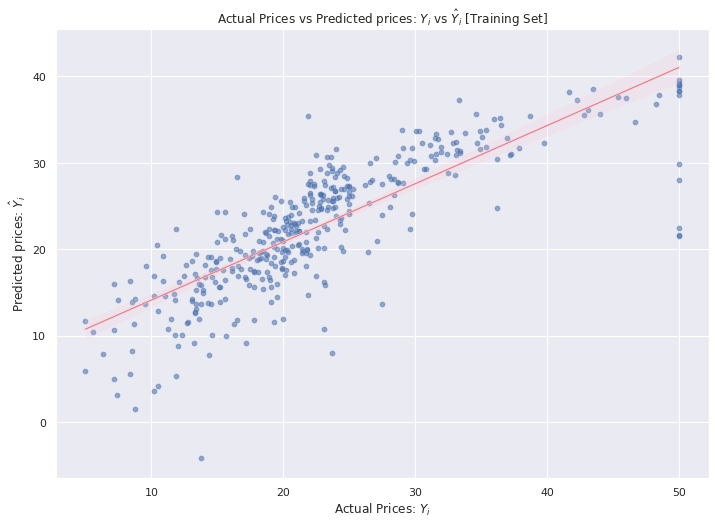

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


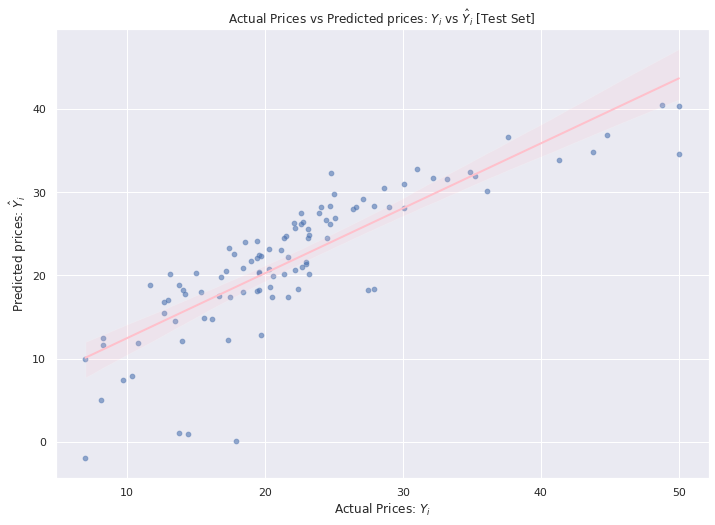

In [ ]:
b, m = np.polynomial.polynomial.polyfit(Y_train, y_train_predict, 1)
sns.scatterplot(Y_train, y_train_predict, alpha=0.4)
sns.regplot(Y_train, y_train_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'pink', 'linewidth': 2})
sns.lineplot(np.unique(Y_train), np.unique(np.poly1d(b + m * np.unique(Y_train))), linewidth=0.5, color='r')

plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
plt.show()



sns.scatterplot(Y_test, y_test_predict, alpha=0.4)
sns.regplot(Y_test, y_test_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'pink', 'linewidth': 2})
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

In [ ]:
dflinear = pd.DataFrame({'Actual':Y_test,'Predicted':y_test_predict})
dflinear

,Actual,Predicted
226,37.6,36.586098
292,27.9,28.299695
90,22.6,26.168914
373,13.8,0.998223
273,35.2,31.896936
...,...,...
349,26.6,28.212262
212,22.4,18.341188
156,13.1,20.117142
480,23.0,21.661020


The linear regression model did a good job of predicting the values on both the training and the test sets.

# Polynomial Regression


In [ ]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)



y_train_predict_poly = poly_model.predict(X_train_poly)
y_test_predict_poly = poly_model.predict(poly_features.fit_transform(X_test))

### Model Evaluation

In [ ]:
### Training set

train_rmse_poly = (np.sqrt(mean_squared_error(Y_train, y_train_predict_poly)))
poly_r2_train = r2_score(Y_train, y_train_predict_poly)
print("The model performance for training set")
print('RMSE is {}'.format(train_rmse_poly))
print('R2 score is {}'.format(poly_r2_train))

The model performance for training set
RMSE is 3.559386107490838
R2 score is 0.8525147951540359


In [ ]:
### Test set

test_rmse_poly = (np.sqrt(mean_squared_error(Y_test, y_test_predict_poly)))
poly_r2_test = r2_score(Y_test, y_test_predict_poly)
print("The model performance for testing set")
print('RMSE is {}'.format(test_rmse_poly))
print('R2 score is {}'.format(poly_r2_test))

The model performance for testing set
RMSE is 3.600589637153832
R2 score is 0.8344155685531964


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


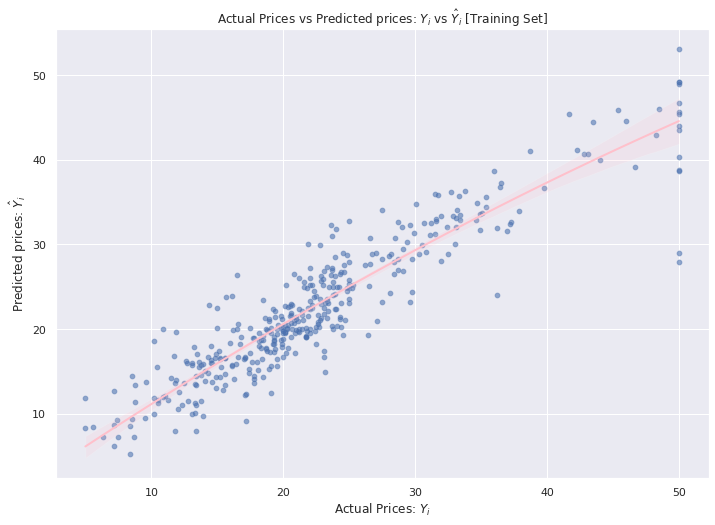

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


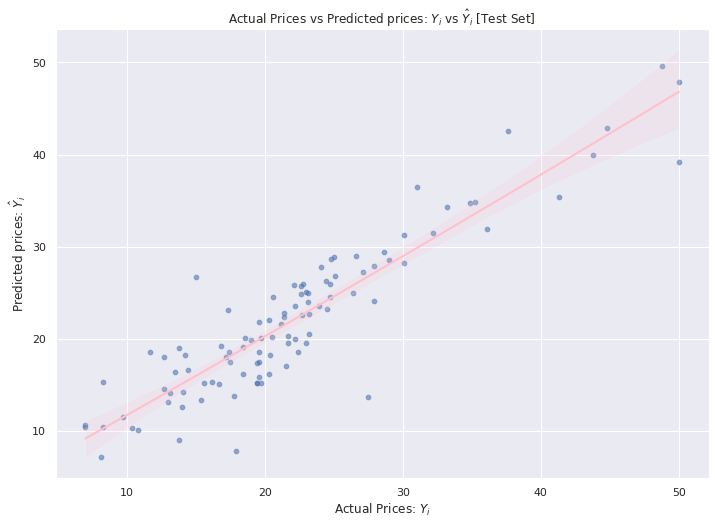

In [ ]:
#Showing predicted vs actual on training set
sns.scatterplot(Y_train, y_train_predict_poly, alpha=0.4)
sns.regplot(Y_train, y_train_predict_poly, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'pink', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
plt.show()

#Showing predicted vs actual on test set
sns.scatterplot(Y_test, y_test_predict_poly, alpha=0.4)
sns.regplot(Y_test, y_test_predict_poly, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'pink', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

In [ ]:
dfpoly = pd.DataFrame({'Actual':Y_test,'Predicted':y_test_predict_poly})
dfpoly

,Actual,Predicted
226,37.6,42.550930
292,27.9,27.873530
90,22.6,25.670256
373,13.8,8.972443
273,35.2,34.848011
...,...,...
349,26.6,28.952303
212,22.4,18.503025
156,13.1,14.085195
480,23.0,25.062737


# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 0)
tree.fit(X_train, Y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

### Model Evaluation

In [ ]:
### Training set

y_train_predict_dt = tree.predict(X_train)
train_rmse_dt = (np.sqrt(mean_squared_error(Y_train, y_train_predict_dt)))
dt_r2_train = r2_score(Y_train, y_train_predict_dt)
print("The model performance for training set")
print('RMSE is {}'.format(train_rmse_dt))
print('R2 score is {}'.format(dt_r2_train))


The model performance for training set
RMSE is 0.0
R2 score is 1.0


In [ ]:
### Test set


y_test_predict_dt = tree.predict(X_test)
test_rmse_dt = (np.sqrt(mean_squared_error(Y_test, y_test_predict_dt)))
dt_r2_test = r2_score(Y_test, y_test_predict_dt)
print("The model performance for testing set")
print('RMSE is {}'.format(test_rmse_dt))
print('R2 score is {}'.format(dt_r2_test))

The model performance for testing set
RMSE is 3.8824517218568237
R2 score is 0.8074762223148056


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


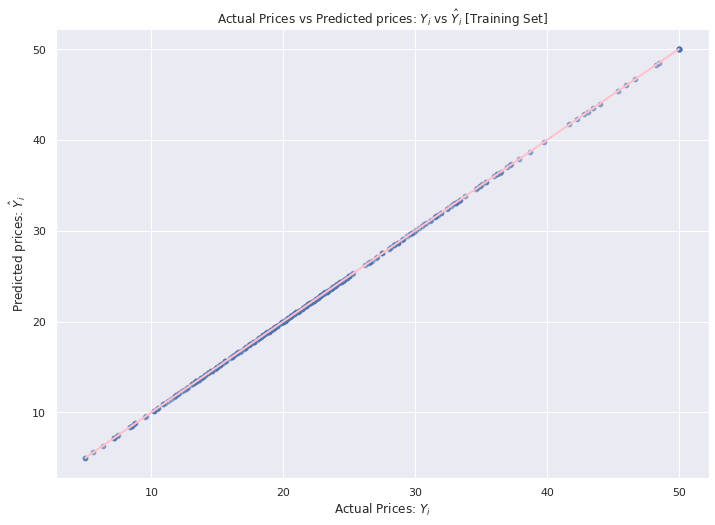

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


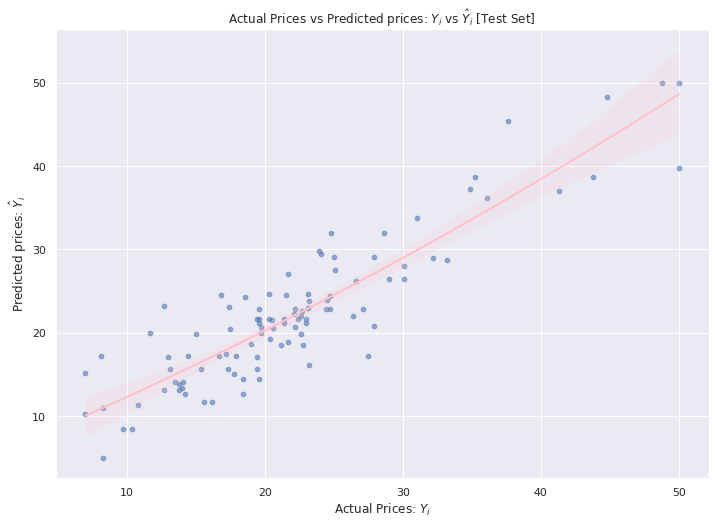

In [ ]:
#Showing predicted vs actual on training set
sns.scatterplot(Y_train, y_train_predict_dt, alpha=0.4)
sns.regplot(Y_train, y_train_predict_dt, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'pink', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
plt.show()

#Showing predicted vs actual on test set
sns.scatterplot(Y_test, y_test_predict_dt, alpha=0.4)
sns.regplot(Y_test, y_test_predict_dt, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'pink', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

In [ ]:
dfdt = pd.DataFrame({'Actual':Y_test,'Predicted':y_test_predict_dt})
dfdt

,Actual,Predicted
226,37.6,45.4
292,27.9,29.1
90,22.6,22.0
373,13.8,13.8
273,35.2,38.7
...,...,...
349,26.6,26.2
212,22.4,21.7
156,13.1,15.6
480,23.0,21.2


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge1 = Ridge()
ridge1.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Model Evaluation


In [ ]:
### Training set

y_train_predict_ridge = ridge1.predict(X_train)
train_rmse_ridge = (np.sqrt(mean_squared_error(Y_train, y_train_predict_ridge)))
ridge_r2_train = r2_score(Y_train, y_train_predict_ridge)
print("The model performance for training set")
print('RMSE is {}'.format(train_rmse_ridge))
print('R2 score is {}'.format(ridge_r2_train))

The model performance for training set
RMSE is 5.302735640393763
R2 score is 0.6726606566748929


In [ ]:
### Test set


y_test_predict_ridge = ridge1.predict(X_test)
test_rmse_ridge = (np.sqrt(mean_squared_error(Y_test, y_test_predict_ridge)))
ridge_r2_test = r2_score(Y_test, y_test_predict_ridge)
print("The model performance for testing set")
print('RMSE is {}'.format(test_rmse_ridge))
print('R2 score is {}'.format(ridge_r2_test))

The model performance for testing set
RMSE is 4.904895794263115
R2 score is 0.6927217526645861


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


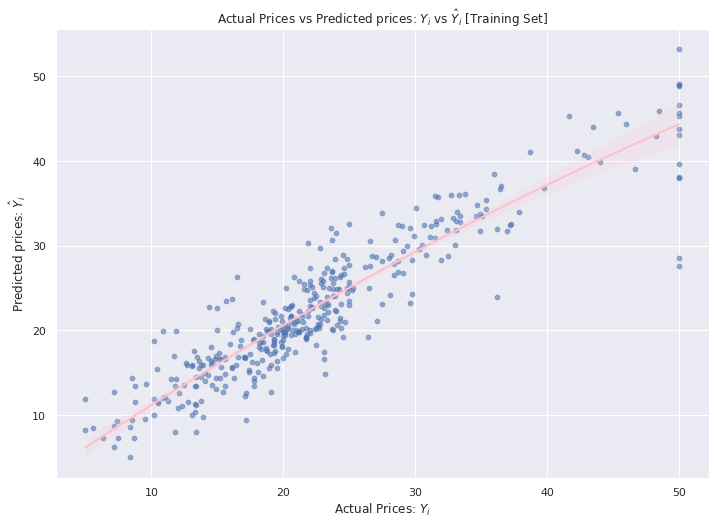

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


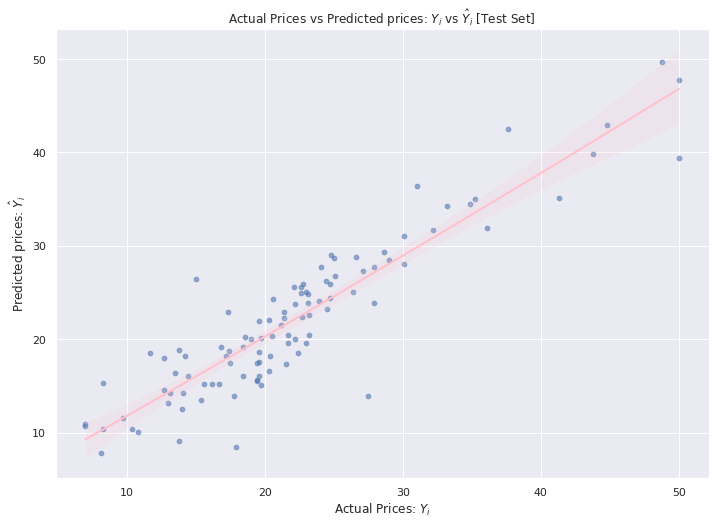

In [ ]:
#Showing predicted vs actual on training set
sns.scatterplot(Y_train, y_train_predict_ridge, alpha=0.4)
sns.regplot(Y_train, y_train_predict_ridge, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'pink', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
plt.show()

#Showing predicted vs actual on test set
sns.scatterplot(Y_test, y_test_predict_ridge, alpha=0.4)
sns.regplot(Y_test, y_test_predict_ridge, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'pink', 'linewidth': 2}, order=2)

plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

In [ ]:
dfridge = pd.DataFrame({'Actual':Y_test,'Predicted':y_test_predict_ridge})
dfridge


,Actual,Predicted
226,37.6,36.569071
292,27.9,28.295090
90,22.6,26.166911
373,13.8,1.042801
273,35.2,31.895380
...,...,...
349,26.6,28.208295
212,22.4,18.358567
156,13.1,20.095921
480,23.0,21.652704


# Comparing Models

In [ ]:
df = pd.DataFrame(
{'RMSE Train' : [train_rmse_linear,train_rmse_poly,train_rmse_dt,train_rmse_ridge],
 'RMSE Test' :[test_rmse_linear,test_rmse_poly,test_rmse_dt,test_rmse_ridge]   
}, index = ['Linear Regression',"Polynomial Regression","DecisionTree","Ridge Regression"]
)
df


,RMSE Train,RMSE Test
Linear Regression,5.302714,4.911195
Polynomial Regression,3.559386,3.600590
DecisionTree,0.000000,3.882452
Ridge Regression,5.302736,4.904896


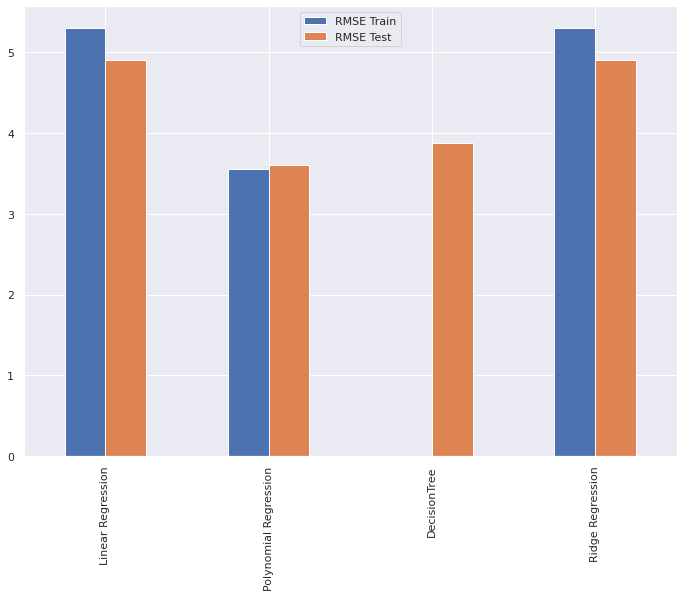

In [ ]:
df.plot(kind = 'bar')

From the above comparison, we can see that Linear Regression performed the worst out of all the regression models. DecisionTree badly overfit the training dataset. It performed better on the test dataset compared to Linear Regression, but did not do as well as Polynomial Regression and Ridge Regression. Polynomial and Ridge Regression both had similar results.

# Fine Tuning


### GridSearchCV

In [ ]:
#Applying Grid Search to find the best model and best parameters
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
              'normalize':[True,False],
              'solver':["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_root_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100],
                         'normalize': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 30, 'normalize': False, 'solver': 'lsqr'}
-5.390287122268078


In [ ]:
prediction_ridge = ridge_regressor.predict(X_test)
rmse_ridge = (np.sqrt(mean_squared_error(Y_test, prediction_ridge)))
ridge_r2 = r2_score(Y_test,prediction_ridge)
print('RMSE is {}'.format(rmse_ridge))
print('R2 score is {}'.format(ridge_r2))

RMSE is 4.773033245041073
R2 score is 0.7090213226747454


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


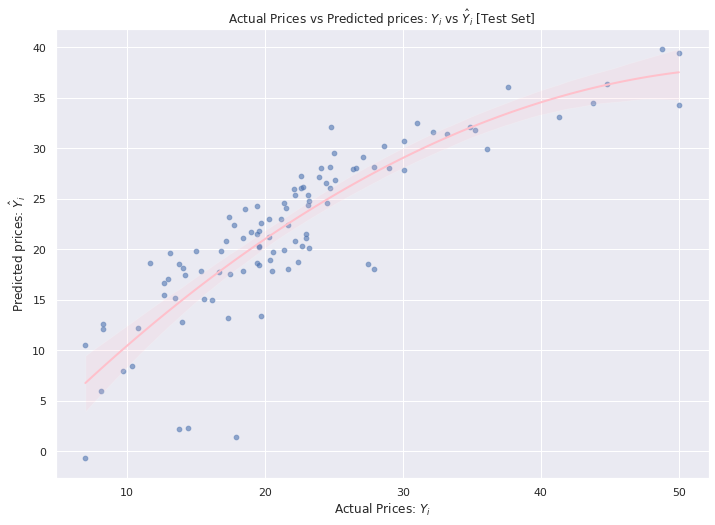

In [ ]:
sns.scatterplot(Y_test, prediction_ridge, alpha=0.4)
sns.regplot(Y_test, prediction_ridge, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'pink', 'linewidth': 2}, order=2)

plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

###RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

ridge_regressor1 = RandomizedSearchCV(ridge,parameters,scoring='neg_root_mean_squared_error',cv=5)
ridge_regressor1.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40, 45, 50, 55, 100],
                                        'normalize': [True, False],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False,
 

In [ ]:
print(ridge_regressor1.best_params_)
print(ridge_regressor1.best_score_)

{'solver': 'svd', 'normalize': False, 'alpha': 50}
-5.398566518608204


In [ ]:
prediction_ridge1 = ridge_regressor1.predict(X_test)
rmse_ridge1 = (np.sqrt(mean_squared_error(Y_test, prediction_ridge1)))
ridge1_r2 = r2_score(Y_test,prediction_ridge1)
print('RMSE is {}'.format(rmse_ridge1))
print('R2 score is {}'.format(ridge1_r2))

RMSE is 4.719875854347517
R2 score is 0.7154665052435127


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


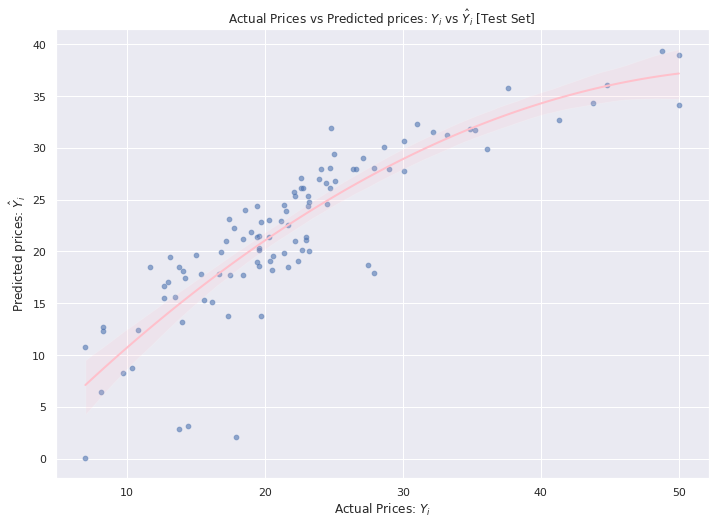

In [ ]:
sns.scatterplot(Y_test, prediction_ridge1, alpha=0.4)
sns.regplot(Y_test, prediction_ridge1, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'pink', 'linewidth': 2}, order=2)

plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

In [ ]:
df2 = pd.DataFrame({'Alpha':['1.0','30','50'],'Normalize':['FALSE','FALSE','FALSE'],'Solver':['auto','lsqr','svd'],'RMSE':[test_rmse_ridge,rmse_ridge,rmse_ridge1],
                    'R2':[ridge_r2_test,ridge_r2,ridge1_r2]},
                   index = ['Before Tuning', 'GridSearchCV','RandomizedSearchCV'])
display(df2)

,Alpha,Normalize,Solver,RMSE,R2
Before Tuning,1.0,FALSE,auto,4.904896,0.692722
GridSearchCV,30,FALSE,lsqr,4.773033,0.709021
RandomizedSearchCV,50,FALSE,svd,4.719876,0.715467


# Conclusion
I performed GridSearchCV and RandomizedSearchCV to optimize the parameters, which in this case were alpha, normalize and solver. Before tuning, the default parameter was 1 for alpha. GridSearchCV yielded 30 as the best value for alpha and RandomizedSearchCV yielded 50. Normalize remained FALSE throughout, as the default and for both the tuning methods as well. Solver changed from auto as the default to lsqr for GridSearchCV and svd for RandomizedSearchCV. GridSearchCV and RandomizedSearchCV both performed only slightly better than the original model with the default parameters. In this case, we cannot choose one tuning method over another, since they both had very similar results. 
